In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df_postLink = pd.read_csv('F:\Lakehead-Study-SpringS\Software\Mid\data\postLinks.csv')
print("Completed loading post link.csv{}".format(df_postLink.shape))
df_user = pd.read_csv(r'F:\Lakehead-Study-SpringS\Software\Mid\data\users.csv')
print("Completed loading user.csv{}".format(df_user.shape))

df_ph = pd.read_csv('F:\Lakehead-Study-SpringS\Software\Mid\data\post_history.csv')
print("Completed loading df_ph.csv {}".format(df_ph.shape[0]))
df_phClose = df_ph[df_ph['ph_type_id']==10]
print("After cleaning the ph data frame {}".format(df_phClose.shape[0]))

df_postShort= pd.read_csv('F:\Lakehead-Study-SpringS\Software\Mid\data\posts_short.csv')
print("Completed loading posts_short.csv {}".format(df_postShort.shape))

df_postLong= pd.read_csv('F:\Lakehead-Study-SpringS\Software\Mid\data\posts_long.csv')
print("Completed loading posts_long.csv {}".format(df_postLong.shape))

Completed loading post link.csv(5292624, 6)
Completed loading user.csv(9321924, 9)
Completed loading df_ph.csv 3641001
After cleaning the ph data frame 415101


C:\Users\Brij\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Completed loading posts_short.csv (676204, 14)
Completed loading posts_long.csv (676204, 16)


In [3]:
df_user['creation_date'] = pd.to_datetime(df_user['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')

df_postLink['creation_date'] = pd.to_datetime(df_postLink['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')

df_postShort['creation_date'] = pd.to_datetime(df_postShort['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')
df_postShort['community_owned_date'] = pd.to_datetime(df_postShort['community_owned_date'],format='%Y-%m-%dT%H:%M:%S.%f')

df_postLong['creation_date'] = pd.to_datetime(df_postLong['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')
df_postLong['community_owned_date'] = pd.to_datetime(df_postLong['community_owned_date'],format='%Y-%m-%dT%H:%M:%S.%f')

df_ph['creation_date'] = pd.to_datetime(df_ph['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')
df_phClose['creation_date'] = pd.to_datetime(df_phClose['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')

<ipython-input-3-2b927fa25705>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phClose['creation_date'] = pd.to_datetime(df_phClose['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')


In [4]:
df_phClQ = df_ph[df_ph['ph_type_id']==10]
df_phClQ['creation_date'] = pd.to_datetime(df_phClQ['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')

<ipython-input-4-cf6e82a0dfa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phClQ['creation_date'] = pd.to_datetime(df_phClQ['creation_date'],format='%Y-%m-%dT%H:%M:%S.%f')


In [11]:
print(len(df_user[df_user['reputation']<100]))
print(len(df_user[(df_user['reputation']>100) & (df_user['reputation']<1000)]))
print(len(df_user[(df_user['reputation']>1000) & (df_user['reputation']<10000)]))
print(len(df_user[(df_user['reputation']>10000) & (df_user['reputation']<100000)]))
print(len(df_user[df_user['reputation']>100000]))



8648725
527588
128957
13491
625


In [13]:
#df_merge = df_ph[['id','ph_type_id','creation_date','comment']]
def getClosedReason(row):
    if pd.isna(row['comment']):
        return -1
    cur_reason_type = int(row['comment'])
    if cur_reason_type == 101 or cur_reason_type == 1:
        return 1
    elif cur_reason_type == 102 or cur_reason_type == 2:
        return 2
    elif cur_reason_type == 105 or cur_reason_type == 3:
        return 3
    elif cur_reason_type == 103 or cur_reason_type == 4:
        return 4
    elif cur_reason_type == 104 or cur_reason_type == 7:
        return 7
    elif cur_reason_type ==10:
        return 10
    else:
        return -1

df_phClQ['CloseReasonType'] = df_phClQ.apply(lambda row: getClosedReason(row), axis=1)

print(df_phClQ.head())

       Unnamed: 0       id  ph_type_id  post_id  \
59227       59227  1259796          10    34093   
59228       59228  1259922          10   116523   
59229       59229  1259938          10   126458   
59230       59230  1259990          10   150743   
59231       59231  1260003          10   153874   

                              revision_guid       creation_date  user_id  \
59227  01675f57-6bb2-44f3-b992-9254c909b556 2008-09-12 11:58:39       -1   
59228  65207d94-b481-41f6-abfb-0078ffdc3624 2008-09-22 20:45:52       -1   
59229  85b398b7-48ae-48a1-a907-de08c41ab1da 2008-09-30 20:42:22       -1   
59230  1e78a0ce-0292-49f2-bfd2-686111b67554 2008-09-29 21:25:14       -1   
59231  d68581b0-311d-4696-9750-05f9d46855ca 2008-09-30 16:36:19       -1   

      user_display_name comment  \
59227               NaN       2   
59228               NaN       1   
59229               NaN       2   
59230               NaN       1   
59231               NaN       1   

                         

<ipython-input-13-3b27387986a1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_phClQ['CloseReasonType'] = df_phClQ.apply(lambda row: getClosedReason(row), axis=1)


In [14]:
data_ClD = df_phClQ[df_phClQ['CloseReasonType']==1]
data_ClD.head()

,Unnamed: 0,id,ph_type_id,post_id,revision_guid,creation_date,user_id,user_display_name,comment,text,CloseReasonType
59228,59228,1259922,10,116523,65207d94-b481-41f6-abfb-0078ffdc3624,2008-09-22 20:45:52,-1,NaN,1,"{""OriginalQuestionIds"":[7074],""Voters"":[{""Id"":...",1
59230,59230,1259990,10,150743,1e78a0ce-0292-49f2-bfd2-686111b67554,2008-09-29 21:25:14,-1,NaN,1,"{""OriginalQuestionIds"":[58119],""Voters"":[{""Id""...",1
59231,59231,1260003,10,153874,d68581b0-311d-4696-9750-05f9d46855ca,2008-09-30 16:36:19,-1,NaN,1,"{""OriginalQuestionIds"":[5727,96285,92001],""Vot...",1
59233,59233,1260083,10,187414,7667047f-edd6-4764-baa0-512af3760dc4,2008-10-09 14:13:53,-1,NaN,1,"{""OriginalQuestionIds"":[167343,150129],""Voters...",1
59234,59234,1260092,10,190531,b1ecbc2c-e120-4928-bc4e-87c54a68ae7a,2008-10-10 08:43:16,-1,NaN,1,"{""OriginalQuestionIds"":[74148],""Voters"":[{""Id""...",1


In [15]:
data_ClD['reputation'] = df_user.iloc[np.where(data_ClD.user_id.isin(df_user.id))]["reputation"]

<ipython-input-15-89444395c1c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ClD['reputation'] = df_user.iloc[np.where(data_ClD.user_id.isin(df_user.id))]["reputation"]


In [16]:
data_ClD

,Unnamed: 0,id,ph_type_id,post_id,revision_guid,creation_date,user_id,user_display_name,comment,text,CloseReasonType,reputation
59228,59228,1259922,10,116523,65207d94-b481-41f6-abfb-0078ffdc3624,2008-09-22 20:45:52.000,-1,NaN,1,"{""OriginalQuestionIds"":[7074],""Voters"":[{""Id"":...",1,2936.0
59230,59230,1259990,10,150743,1e78a0ce-0292-49f2-bfd2-686111b67554,2008-09-29 21:25:14.000,-1,NaN,1,"{""OriginalQuestionIds"":[58119],""Voters"":[{""Id""...",1,51.0
59231,59231,1260003,10,153874,d68581b0-311d-4696-9750-05f9d46855ca,2008-09-30 16:36:19.000,-1,NaN,1,"{""OriginalQuestionIds"":[5727,96285,92001],""Vot...",1,708.0
59233,59233,1260083,10,187414,7667047f-edd6-4764-baa0-512af3760dc4,2008-10-09 14:13:53.000,-1,NaN,1,"{""OriginalQuestionIds"":[167343,150129],""Voters...",1,506.0
59234,59234,1260092,10,190531,b1ecbc2c-e120-4928-bc4e-87c54a68ae7a,2008-10-10 08:43:16.000,-1,NaN,1,"{""OriginalQuestionIds"":[74148],""Voters"":[{""Id""...",1,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3640977,3640977,180953515,10,52134361,50510369-0c9b-4842-a679-978b8996cf72,2018-09-02 06:13:33.757,-1,NaN,101,"{""OriginalQuestionIds"":[34115174],""Voters"":[{""...",1,NaN
3640981,3640981,180953566,10,52134121,abd1960c-b86f-4966-b3c5-e3deb2ce800e,2018-09-02 06:15:29.433,250259,NaN,101,"{""OriginalQuestionIds"":[4261133],""Voters"":[{""I...",1,NaN
3640988,3640988,180953670,10,52134461,7ca21308-a01a-46a4-bbb6-d1b4636cef72,2018-09-02 06:20:00.213,6451573,NaN,101,"{""OriginalQuestionIds"":[21761498],""Voters"":[{""...",1,NaN
3640993,3640993,180953834,10,52011078,7315741b-c811-4ba1-a32c-958b61080b89,2018-09-02 06:28:14.333,3110834,NaN,101,"{""OriginalQuestionIds"":[35493681],""Voters"":[{""...",1,NaN


In [17]:
data_countDup = []
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
# h_count = (df_mergeLD['ClosingTime'] <= 1)

for i in range(0,len(data_ClD)):
#     print(df_mergeLD.head(i)['ClosingTime'])
#     break
   
    if data_ClD.iloc[i]['reputation'] >=0 and data_ClD.iloc[i]['reputation'] < 100:
        count2 = count2 + 1
    elif data_ClD.iloc[i]['reputation'] >= 100 and data_ClD.iloc[i]['reputation'] < 1000:
        count3 = count3 + 1
    elif data_ClD.iloc[i]['reputation'] >= 1000 and data_ClD.iloc[i]['reputation'] < 10000:
        count4 = count4 + 1
    elif data_ClD.iloc[i]['reputation'] >= 10000 and data_ClD.iloc[i]['reputation'] < 100000:
        count5 = count5 + 1
    elif data_ClD.iloc[i]['reputation'] >= 100000:
        count6 = count6 + 1
    else:
        continue
print(f'{count2} {count3} {count4} {count5} {count6}') 

4780 1606 680 71 3


In [18]:
data_countDup.append(count2)
data_countDup.append(count3)
data_countDup.append(count4)
data_countDup.append(count5)
data_countDup.append(count6)
data_countDup

[4780, 1606, 680, 71, 3]

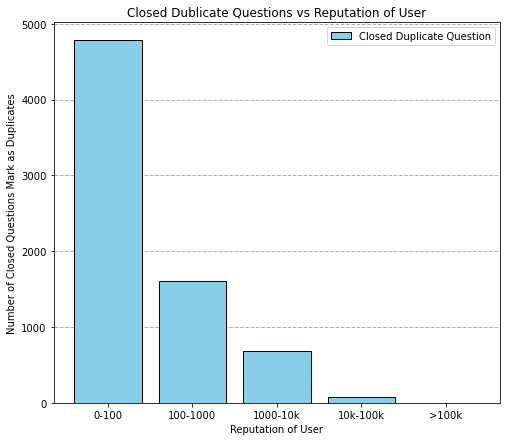

In [62]:
data_reputation=['0-100','100-1000','1000-10k','10k-100k','>100k']
fig5, ax5 = plt.subplots(figsize =(8,7))

ax5.bar(data_reputation,data_countDup, color='skyblue', label='Closed Duplicate Question',edgecolor = "black",zorder=3)
plt.xlabel('Reputation of User')
plt.ylabel('Number of Closed Questions Mark as Duplicates')
plt.title('Closed Dublicate Questions vs Reputation of User')
plt.legend()

plt.grid(axis = 'y',linestyle = '--', linewidth = 1.0)

plt.show()
fig5.savefig('fourth_Q4_final.png')

In [47]:
# unified = pd.DataFrame()
# unified['usr_id'] = df_user.account_id[1:]
# unified['reputation'] = df_user.reputation[1:]

In [48]:
# df_new = pd.DataFrame()
# df_new['postid'] = data_ClD.iloc[np.where(data_ClD.user_id.isin(unified.usr_id))]["post_id"]
# df_new['usr_id'] = data_ClD.iloc[np.where(data_ClD.user_id.isin(unified.usr_id))]["user_id"]

In [49]:
df_new.shape

(138680, 2)

In [50]:
df_new = pd.merge(unified,data_ClD,left_on="usr_id",right_on="user_id",how='outer')

In [51]:
df_new

,usr_id,reputation,Unnamed: 0,id,ph_type_id,post_id,revision_guid,creation_date,user_id,user_display_name,comment,text,CloseReasonType
0,1.0,44300.0,75705.0,1809561.0,10.0,933780.0,b100580e-20e5-4c96-8729-42384f58f91e,2009-06-01 08:33:04.357,1.0,NaN,1,"{""OriginalQuestionIds"":[771197],""Voters"":[{""Id...",1.0
1,1.0,44300.0,80862.0,1952025.0,10.0,1005314.0,9171028d-909c-4448-8c66-94c74a281629,2009-06-17 05:56:18.423,1.0,NaN,1,"{""OriginalQuestionIds"":[713247],""Voters"":[{""Id...",1.0
2,1.0,44300.0,82021.0,1983190.0,10.0,1019862.0,33f1daa0-f1ca-40e1-811a-b21e5100bb14,2009-06-20 05:36:25.203,1.0,NaN,1,"{""OriginalQuestionIds"":[283456],""Voters"":[{""Id...",1.0
3,1.0,44300.0,92055.0,2250560.0,10.0,1151297.0,2aa2128d-6bd7-4c99-86d2-8ae92e956bf4,2009-07-20 05:35:30.523,1.0,NaN,1,"{""OriginalQuestionIds"":[892411],""Voters"":[{""Id...",1.0
4,1.0,44300.0,104423.0,2617098.0,10.0,1071797.0,adb9499b-25d5-4f22-84e3-d05e79aa35c0,2009-08-25 16:11:25.540,1.0,NaN,1,"{""OriginalQuestionIds"":[125319],""Voters"":[{""Id...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976855,NaN,NaN,3634912.0,180707399.0,10.0,52076392.0,53884cb6-cd78-4795-bc8d-86f1d1e476f8,2018-08-29 11:34:28.980,1960455.0,NaN,101,"{""OriginalQuestionIds"":[27266857],""Voters"":[{""...",1.0
9976856,NaN,NaN,3634725.0,180697723.0,10.0,52039893.0,813bc504-13a7-4cc0-9699-1e8c3c071ed5,2018-08-29 09:32:29.133,441757.0,NaN,101,"{""OriginalQuestionIds"":[10636611],""Voters"":[{""...",1.0
9976857,NaN,NaN,3636181.0,180757270.0,10.0,52087637.0,347a4a8b-f138-474d-a98b-c7967daae466,2018-08-30 03:18:53.710,441757.0,NaN,101,"{""OriginalQuestionIds"":[4844643],""Voters"":[{""I...",1.0
9976858,NaN,NaN,3638860.0,180858220.0,10.0,52109313.0,b653460a-dd49-40cd-86a2-c53ca74f4d80,2018-08-31 10:44:28.490,441757.0,NaN,101,"{""OriginalQuestionIds"":[10636611],""Voters"":[{""...",1.0


In [52]:
df_new.dropna(subset=['reputation'],inplace=True)

In [53]:
df_new

,usr_id,reputation,Unnamed: 0,id,ph_type_id,post_id,revision_guid,creation_date,user_id,user_display_name,comment,text,CloseReasonType
0,1.0,44300.0,75705.0,1809561.0,10.0,933780.0,b100580e-20e5-4c96-8729-42384f58f91e,2009-06-01 08:33:04.357,1.0,NaN,1,"{""OriginalQuestionIds"":[771197],""Voters"":[{""Id...",1.0
1,1.0,44300.0,80862.0,1952025.0,10.0,1005314.0,9171028d-909c-4448-8c66-94c74a281629,2009-06-17 05:56:18.423,1.0,NaN,1,"{""OriginalQuestionIds"":[713247],""Voters"":[{""Id...",1.0
2,1.0,44300.0,82021.0,1983190.0,10.0,1019862.0,33f1daa0-f1ca-40e1-811a-b21e5100bb14,2009-06-20 05:36:25.203,1.0,NaN,1,"{""OriginalQuestionIds"":[283456],""Voters"":[{""Id...",1.0
3,1.0,44300.0,92055.0,2250560.0,10.0,1151297.0,2aa2128d-6bd7-4c99-86d2-8ae92e956bf4,2009-07-20 05:35:30.523,1.0,NaN,1,"{""OriginalQuestionIds"":[892411],""Voters"":[{""Id...",1.0
4,1.0,44300.0,104423.0,2617098.0,10.0,1071797.0,adb9499b-25d5-4f22-84e3-d05e79aa35c0,2009-08-25 16:11:25.540,1.0,NaN,1,"{""OriginalQuestionIds"":[125319],""Voters"":[{""Id...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710826,14266748.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
9710827,14266749.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
9710828,14266750.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
9710829,14266751.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [54]:
df_new.dropna(subset=['post_id'],inplace=True)

In [55]:
df_new

,usr_id,reputation,Unnamed: 0,id,ph_type_id,post_id,revision_guid,creation_date,user_id,user_display_name,comment,text,CloseReasonType
0,1.0,44300.0,75705.0,1809561.0,10.0,933780.0,b100580e-20e5-4c96-8729-42384f58f91e,2009-06-01 08:33:04.357,1.0,NaN,1,"{""OriginalQuestionIds"":[771197],""Voters"":[{""Id...",1.0
1,1.0,44300.0,80862.0,1952025.0,10.0,1005314.0,9171028d-909c-4448-8c66-94c74a281629,2009-06-17 05:56:18.423,1.0,NaN,1,"{""OriginalQuestionIds"":[713247],""Voters"":[{""Id...",1.0
2,1.0,44300.0,82021.0,1983190.0,10.0,1019862.0,33f1daa0-f1ca-40e1-811a-b21e5100bb14,2009-06-20 05:36:25.203,1.0,NaN,1,"{""OriginalQuestionIds"":[283456],""Voters"":[{""Id...",1.0
3,1.0,44300.0,92055.0,2250560.0,10.0,1151297.0,2aa2128d-6bd7-4c99-86d2-8ae92e956bf4,2009-07-20 05:35:30.523,1.0,NaN,1,"{""OriginalQuestionIds"":[892411],""Voters"":[{""Id...",1.0
4,1.0,44300.0,104423.0,2617098.0,10.0,1071797.0,adb9499b-25d5-4f22-84e3-d05e79aa35c0,2009-08-25 16:11:25.540,1.0,NaN,1,"{""OriginalQuestionIds"":[125319],""Voters"":[{""Id...",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172895,2415822.0,1.0,3369949.0,167994505.0,10.0,49055044.0,68cb5fec-8985-4b14-9876-cd6e411e608f,2018-03-01 17:12:08.647,2415822.0,NaN,101,"{""OriginalQuestionIds"":[24452562],""Voters"":[{""...",1.0
9172896,2415822.0,1.0,3407983.0,169946268.0,10.0,49518057.0,4febe7e6-69e4-4c27-8d44-a5051972fe3b,2018-03-27 16:28:51.210,2415822.0,NaN,101,"{""OriginalQuestionIds"":[1469474],""Voters"":[{""I...",1.0
9172897,2415822.0,1.0,3475923.0,173208257.0,10.0,47255156.0,61909f87-1075-4d09-8d6d-8593d547fce2,2018-05-11 13:57:47.140,2415822.0,NaN,101,"{""OriginalQuestionIds"":[32000531],""Voters"":[{""...",1.0
9172898,2415822.0,1.0,3611696.0,179771182.0,10.0,51851316.0,8e607496-cca9-4cd2-ac3d-17bf2ed130da,2018-08-15 00:19:24.603,2415822.0,NaN,101,"{""OriginalQuestionIds"":[32170456],""Voters"":[{""...",1.0
